In [131]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



[  0   0   0 ... 999 999 999]
100


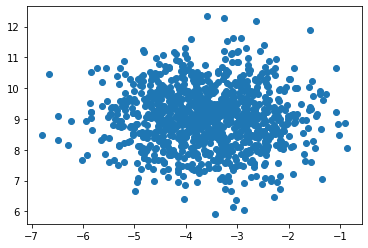

In [132]:
X, y = datasets.make_blobs(n_samples=1000000, centers=1000, n_features=2)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
grouped = df.groupby('label')
df.to_csv('test.csv', sep = ',', index = False)
all_x = df[df["label"]==0]["x"].values
all_y = df[df["label"]==0]["y"].values
plt.scatter(all_x, all_y)

layer = pd.read_csv("test.csv")["label"]
layer = np.sort(layer)
print(layer)
wrong = 0
for i in range(100):
    if np.count_nonzero(layer == i) != 10000:
        wrong += 1
print(wrong)        

               x           y
0     178.916612  -22.984696
1    -162.463025  -20.089946
2    -120.931469 -170.224557
3    -226.347284   24.471908
4    -131.210926  -38.639202
...          ...         ...
9995 -143.539374   22.600655
9996 -251.478960  163.553825
9997 -136.498716   43.272278
9998  -65.023093  106.352757
9999  115.283110   -6.774490

[10000 rows x 2 columns]


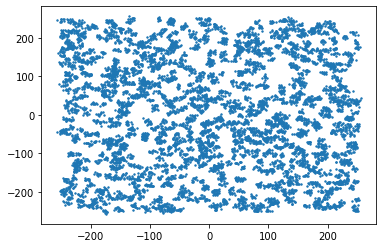

In [133]:

X, y = datasets.make_blobs(n_samples=10000, n_features=2, centers=1000, cluster_std=3, center_box=(-250,250))
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1]))
print(df)
all_x = df["x"].values
all_y = df["y"].values
plt.scatter(all_x, all_y, marker='o', s=2)


In [4]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from operator import concat

num_points_per_layer = 10000
csv_list = []
points_per_layer = np.arange(num_points_per_layer, dtype=float)

for i in range(100):
    X, y = datasets.make_blobs(n_samples=num_points_per_layer, n_features=2, centers=1000, cluster_std=3, center_box=(-250,250))
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1]))
    layer = np.full_like(points_per_layer, i)
    weight = np.full_like(points_per_layer, 1)
    df['layer'] = layer
    df['weight'] = weight
    csv_list.append(df)
csv_merged = pd.concat(csv_list, ignore_index=True) 
csv_merged.to_csv("test_10k.csv", index=False, header=False)

               x           y  layer  weight
0     108.958140 -220.242667    0.0     1.0
1    -162.924141  193.219749    0.0     1.0
2     198.791222  203.418517    0.0     1.0
3    -145.886382 -225.217574    0.0     1.0
4      17.562921   43.725258    0.0     1.0
...          ...         ...    ...     ...
9995 -206.922019  -88.094154    0.0     1.0
9996  142.149578  -52.631627    0.0     1.0
9997  241.349249 -141.867602    0.0     1.0
9998  -99.821131   25.028964    0.0     1.0
9999  -97.799436  241.568384    0.0     1.0

[10000 rows x 4 columns]
               x           y  layer  weight
0    -121.019842   39.366974    1.0     1.0
1     111.254214 -129.371461    1.0     1.0
2    -245.707391  126.199393    1.0     1.0
3     177.000510  168.056447    1.0     1.0
4    -162.247639   56.427248    1.0     1.0
...          ...         ...    ...     ...
9995  237.880832  133.901409    1.0     1.0
9996  190.196367  131.508551    1.0     1.0
9997  103.799397  235.305884    1.0     1.0
9998 -